In [1]:
function bisect(f, xl, xu, es, imax)
    iter = 0
    ea = 100

    xr_all = []
    xl_all = []
    xu_all = []
    ea_all = []

    if f(xl) * f(xu) > 0
        return NaN
    elseif f(xl) == 0
        return xl
    elseif f(xu) == 0
        return xu
    end

    xr = 0

    while ea > es && iter < imax
        xrold = xr
        xr = (xl + xu) / 2
        iter = iter + 1

        if xr != 0
            ea = abs((xr - xrold) / xr) * 100
        end

        test = f(xl) * f(xr)

        if test < 0
            xu = xr
        elseif test > 0
            xl = xr
        else
            ea = 0
        end

        append!(xr_all, xr)
        append!(xl_all, xl)
        append!(xu_all, xu)
        append!(ea_all, ea)
    end

    return xr, iter, xr_all, xl_all, xu_all, ea_all
end

bisect (generic function with 1 method)

In [2]:
function test_1(x)
    return x ^ 2 - 1
end

test_1 (generic function with 1 method)

In [3]:
(xr_bi, iter_bi, xr_all_bi, xu_all_bi, ea_all_bi) = bisect(test_1, 0, 1.3, 0.01, 10000)
println(xr_bi)
println(iter_bi)

0.9999938964843751
14


In [4]:
function falseposition(f, xl, xu, es, imax)
    iter = 0
    ea = 100

    xr_all = []
    xl_all = []
    xu_all = []
    ea_all = []

    if f(xl) * f(xu) > 0
        return NaN
    elseif f(xl) == 0
        return xl
    elseif f(xu) == 0
        return xu
    end

    xr = 0

    while ea > es && iter < imax
        xrold = xr
        xr = xu - (f(xu) * (xl - xu) / (f(xl) - f(xu)))
        iter = iter + 1

        if xr != 0
            ea = abs((xr - xrold) / xr) * 100
        end

        test = f(xl) * f(xr)

        if test < 0
            xu = xr
        elseif test > 0
            xl = xr
        else
            ea = 0
        end

        append!(xr_all, xr)
        append!(xl_all, xl)
        append!(xu_all, xu)
        append!(ea_all, ea)
    end

    return xr, iter, xr_all, xl_all, xu_all, ea_all
end

falseposition (generic function with 1 method)

In [5]:
(xr_fp, iter_fp, xr_all_fp, xl_all_fp, xu_all_fp, ea_all_fp) = falseposition(test_1, 0, 1.3, 0.01, 10000)
println(xr_fp)
println(iter_fp)

0.9999901510854564
6


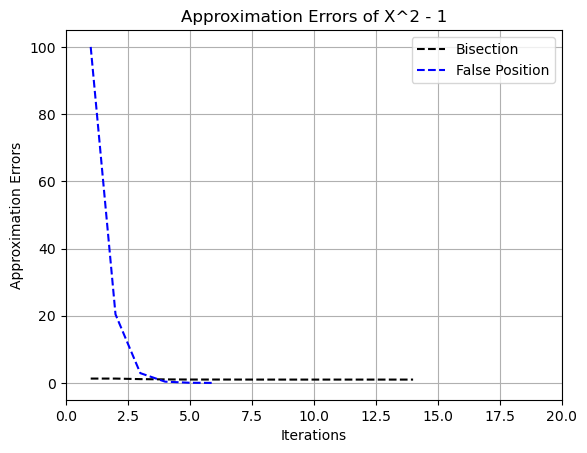

In [6]:
using PyPlot
plot(1:iter_bi, ea_all_bi, "k--", label="Bisection")
plot(1:iter_fp, ea_all_fp, "b--", label="False Position")

xlabel("Iterations")
ylabel("Approximation Errors")

ax = gca()
ax[:set_xlim]([0, 20])

title("Approximation Errors of X^2 - 1")

legend(loc="best")
grid(true)

In [7]:
function test_2(x)
    return x ^ 10 - 1
end

test_2 (generic function with 1 method)

In [8]:
(xr_bi, iter_bi, xr_all_bi, xl_all_bi, xu_all_bi, ea_all_bi) = bisect(test_2, 0, 1.3, 0.01, 10000)
println(xr_bi)
println(iter_bi)

0.9999938964843751
14


In [9]:
(xr_fp, iter_fp, xr_all_fp, xl_all_fp, xu_all_fp, ea_all_fp) = falseposition(test_2, 0, 1.3, 0.01, 10000)
println(xr_fp)
println(iter_fp)

0.9996886513360608
39


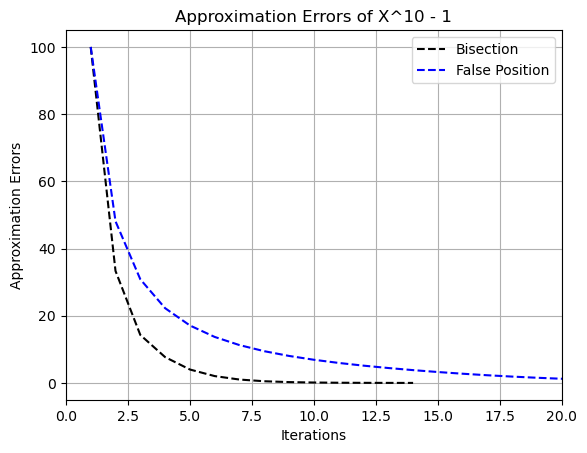

In [10]:
using PyPlot

plot(1:iter_bi, ea_all_bi, "k--", label="Bisection")
plot(1:iter_fp, ea_all_fp, "b--", label="False Position")

xlabel("Iterations")
ylabel("Approximation Errors")

ax = gca()
ax[:set_xlim]([0, 20])

title("Approximation Errors of X^10 - 1")

legend(loc="best")
grid(true)

In [11]:
function newton_raphson(f, f_diff, xi, es, imax)
    iter = 0
    ea = 100

    xi_all = []
    ea_all = []

    while ea > es && iter < imax
        xiold = xi
        xi = xi - f(xi) / f_diff(xi)
        iter = iter + 1

        if xi != 0
            ea = abs((xi - xiold) / xi) * 100
        elseif f(xi) == 0
            ea = 0
        end

        append!(xi_all, xi)
        append!(ea_all, ea)
    end

    return xi, iter, xi_all, ea_all
end

newton_raphson (generic function with 1 method)

In [12]:
function test_3(x)
    return exp(-x) - x
end

test_3 (generic function with 1 method)

In [13]:
function test_3_diff(x)
    return -exp(-x) - 1
end

test_3_diff (generic function with 1 method)

In [14]:
(xi_nr, iter_nr, xi_all_nr, ea_all_nr) = newton_raphson(test_3, test_3_diff, 0, 0.01, 10000)
println(xi_nr)
println(iter_nr)

0.5671432904097811
4


In [15]:
function secant(f, xi, ximinus1, es, imax)
    iter = 0
    ea = 100

    xi_all = []
    ea_all = []

    while ea > es && iter < imax
        xinext = xi - (f(xi) * (ximinus1 - xi)) / (f(ximinus1) - f(xi))
        iter = iter + 1

        ximinus1, xi = xi, xinext

        if xi != 0
            ea = abs((xi - ximinus1) / xi) * 100
        elseif f(xi) == 0
            ea = 0
        end

        append!(xi_all, xi)
        append!(ea_all, ea)
    end

    return xi, iter, xi_all, ea_all
end

secant (generic function with 1 method)

In [16]:
(xi_sc, iter_sc, xi_all_sc, ea_all_sc) = secant(test_3, 0, -1, 0.01, 10000)
println(xi_sc)
println(iter_sc)

0.5671432898771658
5


In [17]:
(xr_bi, iter_bi, xr_all_bi, xl_all_bi, xu_all_bi, ea_all_bi) = bisect(test_3, 0, 1.3, 0.01, 10000)
println(xr_bi)
println(iter_bi)

0.5671234130859376
15


In [18]:
(xr_fp, iter_fp, xr_all_fp, xl_all_fp, xu_all_fp, ea_all_fp) = falseposition(test_3, 0, 1.3, 0.01, 10000)
println(xr_fp)
println(iter_fp)

0.5671445370565966
6


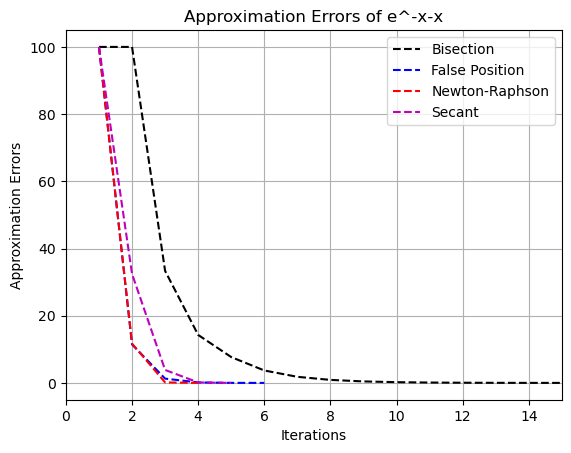

In [19]:
using PyPlot

plot(1:iter_bi, ea_all_bi, "k--", label="Bisection")
plot(1:iter_fp, ea_all_fp, "b--", label="False Position")
plot(1:iter_nr, ea_all_nr, "r--", label="Newton-Raphson")
plot(1:iter_sc, ea_all_sc, "m--", label="Secant")

xlabel("Iterations")
ylabel("Approximation Errors")

ax = gca()
ax[:set_xlim]([0, 15])

title("Approximation Errors of e^-x-x")

legend(loc="best")
grid(true)

# Task

In [20]:
(xr_bi, iter_bi, xr_all_bi, xl_all_bi, xu_all_bi, ea_all_bi) = bisect(test_3, 0, 1.3, 0.00001, 10000)
println(xr_bi)
println(iter_bi)

0.5671432882547379
25


In [21]:
(xr_fp, iter_fp, xr_all_fp, xl_all_fp, xu_all_fp, ea_all_fp) = falseposition(test_3, 0, 1.3, 0.00001, 10000)
println(xr_fp)
println(iter_fp)

0.5671432921242093
9


In [22]:
(xi_nr, iter_nr, xi_all_nr, ea_all_nr) = newton_raphson(test_3, test_3_diff, 0, 0.00001, 10000)
println(xi_nr)
println(iter_nr)

0.567143290409784
5


In [23]:
(xi_sc, iter_sc, xi_all_sc, ea_all_sc) = secant(test_3, 0, -1, 0.00001, 10000)
println(xi_sc)
println(iter_sc)

0.5671432904097835
6


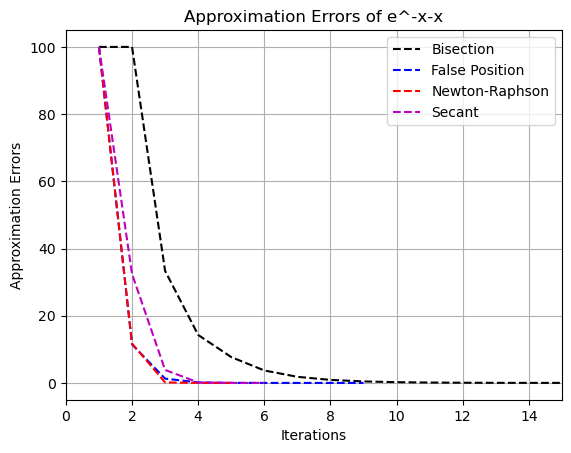

In [24]:
using PyPlot

plot(1:iter_bi, ea_all_bi, "k--", label="Bisection")
plot(1:iter_fp, ea_all_fp, "b--", label="False Position")
plot(1:iter_nr, ea_all_nr, "r--", label="Newton-Raphson")
plot(1:iter_sc, ea_all_sc, "m--", label="Secant")

xlabel("Iterations")
ylabel("Approximation Errors")

ax = gca()
ax[:set_xlim]([0, 15])

title("Approximation Errors of e^-x-x")

legend(loc="best")
grid(true)